In [35]:
data_folder = r"n3\train"
output_folder = r"n3a\train"

ignore_classes = True
output_image_size = 128
input_intensity_scaling = 1 / 255.0

In [36]:
import os

from local_vars import root_folder

data_fullpath = os.path.join(root_folder, data_folder)

image_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('.png')]
annot_file_list = [f for f in os.listdir(data_fullpath) if f.endswith('.csv')]
num_images = len(image_file_list)

print("Found {} image files".format(num_images))
print("Found {} annotation files".format(len(annot_file_list)))

Found 5604 image files
Found 1 annotation files


In [37]:
import pandas

annot_df = pandas.DataFrame()

for i in range(len(annot_file_list)):
    current_file_path = os.path.join(data_fullpath, annot_file_list[i])
    annot_df = pandas.concat([annot_df, pandas.read_csv(current_file_path)])
    
print("Number of annotations found: {}".format(annot_df.shape[0]))

Number of annotations found: 5604


In [38]:
import numpy as np

if ignore_classes == True:
    annot_df['class'] = 0

class_numbers = annot_df[['class']].values
num_classes = max(class_numbers)[0] + 1

print("{} classes found".format(num_classes))

class_data = np.zeros([num_images, num_classes])
locations_data = np.zeros([num_images, 2])

1 classes found


In [39]:
annot_df.head(5)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,filename,width,height,class,x,y
0,0,699,1405,n3_1458.png,512,512,0,368,316
1,1,700,1406,n3_1459.png,512,512,0,368,316
2,2,701,1407,n3_1460.png,512,512,0,368,318
3,3,702,1408,n3_1461.png,512,512,0,368,318
4,4,703,1409,n3_1462.png,512,512,0,368,318


In [40]:
import cv2
from ipywidgets import IntProgress
from IPython.display import display

image_data = np.zeros([num_images, output_image_size, output_image_size, 1]).astype(np.uint8)

f = IntProgress(min=0, max=num_images)
print("Reading files and saving them in numpy arrays...")
display(f)

for i in range(num_images):
    f.value = i
    current_file_name = image_file_list[i]
    current_file_path = os.path.join(data_fullpath, current_file_name)
    image = cv2.imread(current_file_path, 0)
    if image is None:
        print("File not read: {}".format(current_file_path))
        break
    if image.shape[0] != output_image_size or image.shape[1] != output_image_size:
        image_data[i][:,:,0] = cv2.resize(image, (output_image_size, output_image_size)).astype(np.uint8)
    else:
        image_data[i][:,:,0] = image.astype(np.uint8)
    class_number = annot_df[annot_df.filename==current_file_name]['class'].values[0]
    class_data[i,class_number] = 1
    location = annot_df[annot_df.filename==current_file_name][['x', 'y']].values[0]
    locations_data[i] = location
    

image_data = image_data * input_intensity_scaling

Reading files and saving them in numpy arrays...


IntProgress(value=0, max=5604)

Showing image #2802 of 5604
Location: [352. 298.]


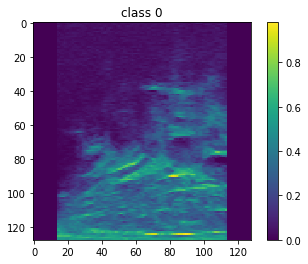

In [43]:
# Show an example positive image to make sure data is read properly.
# This cell is not necessary to generate output, but it's nice to check that the data looks good.

import matplotlib.pyplot as plt

if num_classes > 1:
    class_1_indices = np.where(class_data[:,1]==1)
    class_1_image_index = class_1_indices[0][len(class_1_indices[0]) // 2]
    print("Showing image #{} of {}".format(class_1_image_index, num_images))

    plt.imshow(image_data[class_1_image_index, :, :, 0])
    plt.colorbar()
    plt.title("class 1")
    plt.show()

class_0_indices = np.where(class_data[:,0]==1)
class_0_image_index = class_0_indices[0][len(class_0_indices[0]) // 2]
print("Showing image #{} of {}".format(class_0_image_index, num_images))
print("Location: {}".format(locations_data[class_0_image_index]))

plt.imshow(image_data[class_0_image_index, :, :, 0])
plt.colorbar()
plt.title("class 0")
plt.show()


In [42]:
output_fullpath = os.path.join(root_folder, output_folder)

if not os.path.exists(output_fullpath):
    os.makedirs(output_fullpath)
    print("Created folder: " + output_fullpath)

images_output_file = os.path.join(output_fullpath, "images")
class_output_file = os.path.join(output_fullpath, "classes")
locations_output_file = os.path.join(output_fullpath, "locations")

print("Saving images to:    {}".format(images_output_file))
print("Saving classes to:   {}".format(class_output_file))
print("Saving locations to: {}".format(locations_output_file))

np.save(images_output_file, image_data)
np.save(class_output_file, class_data)
np.save(locations_output_file, locations_data)

Created folder: c:\Data\n3a\train
Saving images to:    c:\Data\n3a\train\images
Saving classes to:   c:\Data\n3a\train\classes
Saving locations to: c:\Data\n3a\train\locations
